## 탐욕 알고리즘의 이해

### 1. 탐욕 알고리즘 이란?
- Greedy algorithm 또는 탐욕 알고리즘 이라고 불리움
- 최적의 해에 가까운 값을 구하기 위해 사용됨
- 여러 경우 중 하나를 결정해야할 때마다, **매순간 최적이라고 생각되는 경우를 선택**하는 방식으로 진행해서, 최종적인 값을 구하는 방식

### 2. 탐욕 알고리즘 예
### 문제1: 동전 문제
  - 지불해야 하는 값이 4720원 일 때 1원 50원 100원, 500원 동전으로 동전의 수가 가장 적게 지불하시오.
    - 가장 큰 동전부터 최대한 지불해야 하는 값을 채우는 방식으로 구현 가능
    - 탐욕 알고리즘으로 매순간 최적이라고 생각되는 경우를 선택하면 됨

In [5]:
coin_list = [1, 100, 50, 500]
print (coin_list)
coin_list.sort(reverse=True)
print (coin_list)

[1, 100, 50, 500]
[500, 100, 50, 1]


In [6]:
coin_list = [500, 100, 50, 1]

def min_coin_count(value, coin_list):
    total_coin_count = 0
    details = list()
    coin_list.sort(reverse=True)
    for coin in coin_list:
        coin_num = value // coin
        total_coin_count += coin_num
        value -= coin_num * coin
        details.append([coin, coin_num])
    return total_coin_count, details

In [7]:
min_coin_count(4720, coin_list)

(31, [[500, 9], [100, 2], [50, 0], [1, 20]])

### 문제2: 부분 배낭 문제 (Fractional Knapsack Problem)
  - 무게 제한이 k인 배낭에 최대 가치를 가지도록 물건을 넣는 문제
    - 각 물건은 무게(w)와 가치(v)로 표현될 수 있음
    - 물건은 쪼갤 수 있으므로 물건의 일부분이 배낭에 넣어질 수 있음, 그래서 Fractional Knapsack Problem 으로 부름
      - Fractional Knapsack Problem 의 반대로 물건을 쪼개서 넣을 수 없는 배낭 문제도 존재함 (0/1 Knapsack Problem 으로 부름)
    <img src="https://www.fun-coding.org/00_Images/knapsack.png">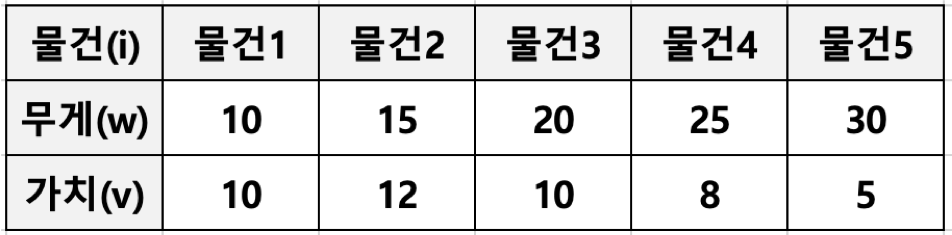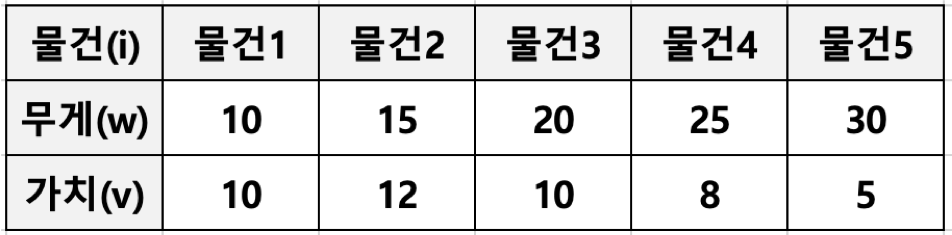

In [13]:
data_list = [(10, 10), (15, 12), (20, 10), (25, 8), (30, 5)]

In [19]:
def get_max_value(data_list, capacity):
    data_list = sorted(data_list, key=lambda x: x[1] / x[0], reverse=True)
    total_value = 0
    details = list()
    
    for data in data_list:
        if capacity - data[0] >= 0:
            capacity -= data[0]
            total_value += data[1]
            details.append([data[0], data[1], 1])
        else:
            fraction = capacity / data[0]
            total_value += data[1] * fraction
            details.append([data[0], data[1], fraction])
            break
    return total_value, details

In [20]:
get_max_value(data_list, 30)

(24.5, [[10, 10, 1], [15, 12, 1], [20, 10, 0.25]])

### 3. 탐욕 알고리즘의 한계
- 탐욕 알고리즘은 근사치 추정에 활용
- 반드시 최적의 해를 구할 수 있는 것은 아니기 때문
- 최적의 해에 가까운 값을 구하는 방법 중의 하나임

### 예
<img src="https://www.fun-coding.org/00_Images/greedy.png" width=300>

- '시작' 노드에서 시작해서 가장 작은 값을 찾아 leaf node 까지 가는 경로를 찾을 시에
  - Greedy 알고리즘 적용시 시작 -> 7 -> 12 를 선택하게 되므로 7 + 12 = 19 가 됨 
  - 하지만 실제 가장 작은 값은 시작 -> 10 -> 5 이며, 10 + 5 = 15 가 답![greedy.png](attachment:66190c01-e90e-4d07-aaac-c6558f9492a5.png)![download.png](attachment:488579ca-7a66-412f-8b89-488e81213dd4.png)